In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import edhec_risk_kit_109 as erk
import pandas as pd
import numpy as np

In [6]:
ret = pd.read_csv("../data/edhec-hedgefundindices.csv",  header = 0, index_col=0,  parse_dates = True )
ret.index = pd.to_datetime(ret.index, format='%Y%m').to_period('M')
a = ret[ret.index >= '2000-01']

In [7]:
#Parametric Gaussian VaR
erk.var_gaussian(a, level=1, modified=False)

Convertible Arbitrage      3.484471
CTA Global                 5.033613
Distressed Securities      3.143018
Emerging Markets           5.807041
Equity Market Neutral      1.477190
Event Driven               3.085309
Fixed Income Arbitrage     1.951918
Global Macro               2.461907
Long/Short Equity          3.942044
Merger Arbitrage           1.535518
Relative Value             2.160459
Short Selling             10.213030
Funds Of Funds             2.938540
dtype: float64

In [8]:
#Parametric VaR - Cornish Fischer
erk.var_gaussian(a, level=1, modified=True)

Convertible Arbitrage     10.366556
CTA Global                 4.664321
Distressed Securities      4.966909
Emerging Markets           8.679551
Equity Market Neutral      4.143206
Event Driven               4.573181
Fixed Income Arbitrage     6.647930
Global Macro               2.278564
Long/Short Equity          5.138116
Merger Arbitrage           2.128243
Relative Value             4.898484
Short Selling              9.832259
Funds Of Funds             4.879303
dtype: float64

In [11]:
erk.var_historic(a, level=1)

Convertible Arbitrage      3.1674
CTA Global                 5.0938
Distressed Securities      4.2642
Emerging Markets           6.5496
Equity Market Neutral      1.9800
Event Driven               3.8540
Fixed Income Arbitrage     3.0748
Global Macro               2.2632
Long/Short Equity          4.5060
Merger Arbitrage           2.2654
Relative Value             2.1788
Short Selling             10.7684
Funds Of Funds             2.7200
dtype: float64

## POrtfolio Theory

In [49]:
rets = erk.get_ind_returns(location="../data/ind30_m_vw_rets.csv")
er = erk.annualize_rets(rets["2013":"2017"], 12)
cov = rets["2013":"2017"].cov()

In [50]:
l = ["Books", "Steel", "Oil", "Mines" ]
cov.loc[l, l]

,Books,Steel,Oil,Mines
Books,0.002720,0.001940,0.001637,0.001539
Steel,0.001940,0.004391,0.002122,0.003391
Oil,0.001637,0.002122,0.002697,0.002179
Mines,0.001539,0.003391,0.002179,0.005232


In [51]:
#retuns
er[l]

Books    0.095312
Steel    0.100716
Oil      0.025275
Mines    0.005136
dtype: float64

In [52]:
import edhec_risk_kit_111 as erk10

In [56]:
msr_w = erk10.msr(0.10, er[l], cov.loc[l, l])
msr_w*100

array([2.48759346e-13, 1.00000000e+02, 1.77809156e-14, 0.00000000e+00])

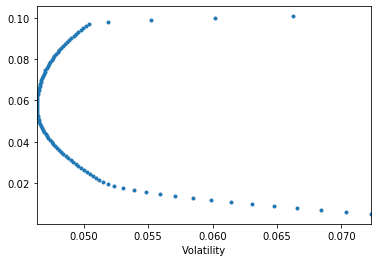

In [54]:
erk10.plot_ef(100, er[l], cov.loc[l, l], style='.', legend=False, show_cml=False, riskfree_rate=0.0)

In [62]:
#Global Min Variance
gmv_w = erk10.gmv(cov.loc[l, l])
gmv_w*100

array([47.70248534,  0.        , 43.41120413,  8.88631053])

In [63]:
# Q 11, 12
# Get return and vol in 2018

cov2018_mo = rets["2018"][l].cov()
cov2018_mo
cov2018_annualized = cov2018_mo * 12

er2018 = erk.annualize_rets(rets["2018"], 12)

In [67]:
erk10.portfolio_vol(msr_w,  cov2018_annualized)

0.2198398818148417

In [66]:
 erk10.portfolio_vol(gmv_w,  cov2018_annualized)

0.2198398818148417